# AWS product review end-to-end pipeline

## 1. Load Datasets

In [1]:
import pandas as pd
from pyrecdp.datasets import amazon_product_review
train_data = amazon_product_review().to_pandas()
print("original input is ")
display(train_data)
train_data.dtypes

/usr/local/lib/python3.10/dist-packages/pyrecdp/datasets/amazon_product_review.py:12: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_table(self.saved_path, on_bad_lines='skip')


original input is 


,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,25933450,RJOVP071AVAJO,0439873800,84656342,There Was an Old Lady Who Swallowed a Shell!,Books,5,0.0,0.0,N,Y,Five Stars,I love it and so does my students!,2015-08-31
1,US,1801372,R1ORGBETCDW3AI,1623953553,729938122,I Saw a Friend,Books,5,0.0,0.0,N,Y,"Please buy ""I Saw a Friend""! Your children wil...",My wife and I ordered 2 books and gave them as...,2015-08-31
2,US,5782091,R7TNRFQAOUTX5,142151981X,678139048,"Black Lagoon, Vol. 6",Books,5,0.0,0.0,N,Y,Shipped fast.,Great book just like all the others in the ser...,2015-08-31
3,US,32715830,R2GANXKDIFZ6OI,014241543X,712432151,If I Stay,Books,5,0.0,0.0,N,N,Five Stars,So beautiful,2015-08-31
4,US,14005703,R2NYB6C3R8LVN6,1604600527,800572372,Stars 'N Strips Forever,Books,5,2.0,2.0,N,Y,Five Stars,Enjoyed the author's story and his quilts are ...,2015-08-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10236845,US,52004451,R2OUP8UJV6LEVO,B003ZX1EQS,381270854,"Teilhard De Chardin By Doran McCarty, Makers o...",Books,5,0.0,0.0,N,N,"A GENERALLY ""POSITIVE"" EVANGELICAL ASSESSMENT ...",Doran McCarty is professor of Christian minist...,2012-05-03
10236846,US,36099005,R34K82WIMNWJBL,0786652918,14254333,1: Mel Bay's Master Anthology of Jazz Guitar S...,Books,4,0.0,0.0,N,N,Good chord solo book for intermediate to advan...,The Mel Bay Master Anthology of Jazz Guitar So...,2012-05-03
10236847,US,38081951,R3JHG8BPWJVN6S,1608981215,331746774,The Punk Ethic,Books,4,0.0,1.0,N,N,A delicious afternoon read,There is something about Timothy Decker's THE ...,2012-05-03
10236848,US,53040283,R3EOQVV7MU668R,0670023418,184956679,Aunt Dimity and the Village Witch,Books,5,1.0,1.0,N,N,Really Enjoyed It,I really enjoyed this book. It is a type of my...,2012-05-03


marketplace           object
customer_id            int64
review_id             object
product_id            object
product_parent         int64
product_title         object
product_category      object
star_rating           object
helpful_votes        float64
total_votes          float64
vine                  object
verified_purchase     object
review_headline       object
review_body           object
review_date           object
dtype: object

## 2. create pipeline for training

None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.
'HTTPSConnectionPool(host='huggingface.co', port=443): Max retries exceeded with url: /bert-base-multilingual-cased/resolve/main/vocab.txt (Caused by ProxyError('Cannot connect to proxy.', TimeoutError('timed out')))' thrown while requesting HEAD https://huggingface.co/bert-base-multilingual-cased/resolve/main/vocab.txt
'HTTPSConnectionPool(host='huggingface.co', port=443): Max retries exceeded with url: /bert-base-multilingual-cased/resolve/main/vocab.txt (Caused by ProxyError('Cannot connect to proxy.', TimeoutError('timed out')))' thrown while requesting HEAD https://huggingface.co/bert-base-multilingual-cased/resolve/main/vocab.txt


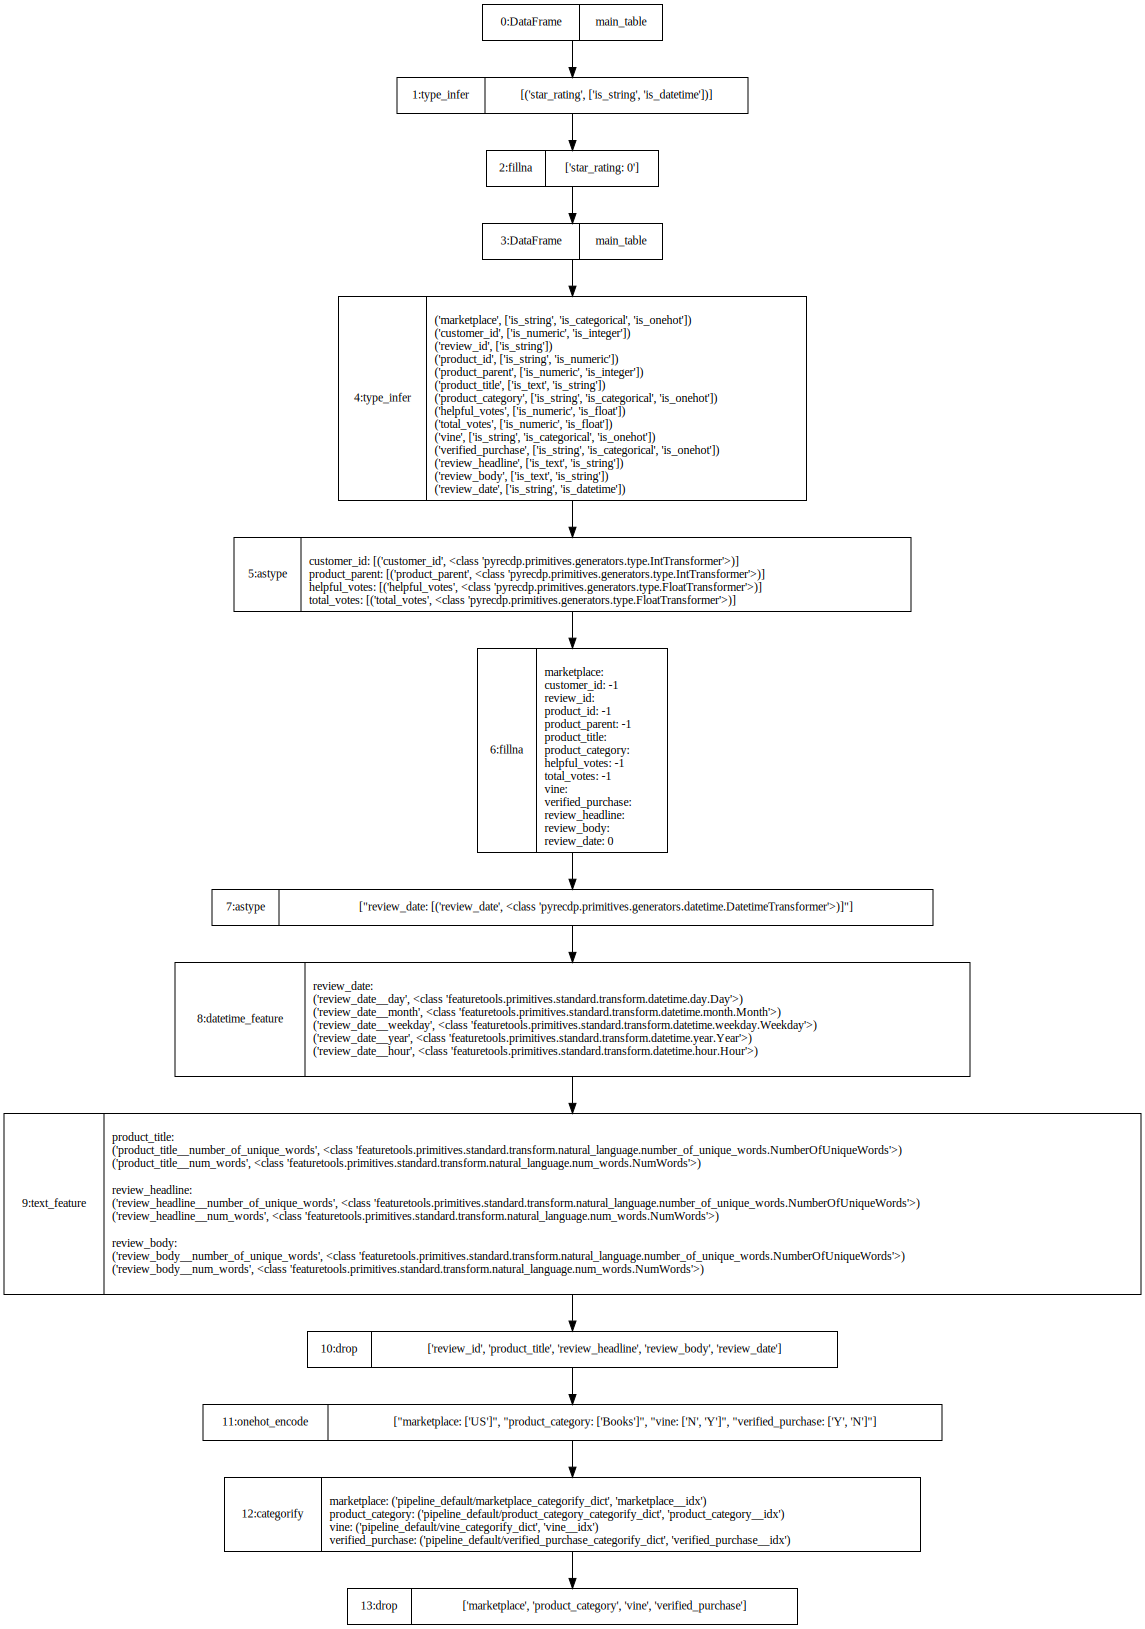

In [2]:
from pyrecdp.autofe import FeatureWrangler, DataEstimator

data_pipeline = FeatureWrangler(dataset=train_data, label="star_rating")
data_pipeline.plot()
# config = {
#     'model_file': 'test_amazonreview.mdl',
#     'metrics': 'rmse', 
#     'objective': 'regression', 
#     'model_name': 'lightgbm'}
# train_pipeline = DataEstimator(method = 'train', data_pipeline = data_pipeline, config = config)
# train_pipeline.plot()

## 3. execute pipeline w/ spark

In [3]:
data_pipeline.fit_transform('spark')

Will assign 48 cores and 308502 M memory for spark
23/04/01 04:13:25 WARN Utils: Your hostname, sr414 resolves to a loopback address: 127.0.1.1; using 10.1.2.14 instead (on interface enp134s0f1)
23/04/01 04:13:25 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/04/01 04:13:25 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
per core memory size is 6.276 GB and shuffle_disk maximum capacity is 8589934592.000 GB
{0: DataFrame, 1: type_infer, 2: fillna, 3: DataFrame, 4: type_infer, 5: astype, 6: fillna, 7: astype, 8: datetime_feature, 9: text_feature, 10: drop, 11: onehot_encode, 12: categorify, 13: drop}
execute with spark started ...
append DataFrame
append type_infer
append DataFrameToRDDConverter
DataframeConvert partition pandas dataframe to spark RDD took 34.467 secs
append fillna
append DataFrame
append type_infer
append astype
append fillna
append astype
append datetime_feature
append text_feature
append drop
append onehot_encode
append RDDToDataFrameConverter


DataframeTransform took 78.767 secs, processed 10236850 rows with num_partitions as 200
DataframeTransform combine to one pandas dataframe took 1.369 secs
append categorify
append drop
execute with spark took 129.96155895106494 sec


,customer_id,product_id,product_parent,star_rating,helpful_votes,total_votes,review_date__day,review_date__month,review_date__weekday,review_date__year,...,marketplace__US,product_category__Books,vine__N,vine__Y,verified_purchase__N,verified_purchase__Y,marketplace__idx,product_category__idx,vine__idx,verified_purchase__idx
0,25933450,4.398738e+08,84656342,5,0.0,0.0,31,8,0,2015,...,1,1,1,0,0,1,0,60,1,2
1,1801372,1.623954e+09,729938122,5,0.0,0.0,31,8,0,2015,...,1,1,1,0,0,1,0,60,1,2
2,5782091,-1.000000e+00,678139048,5,0.0,0.0,31,8,0,2015,...,1,1,1,0,0,1,0,60,1,2
3,32715830,-1.000000e+00,712432151,5,0.0,0.0,31,8,0,2015,...,1,1,1,0,1,0,0,60,1,1
4,14005703,1.604601e+09,800572372,5,2.0,2.0,31,8,0,2015,...,1,1,1,0,0,1,0,60,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10236845,52004451,-1.000000e+00,381270854,5,0.0,0.0,3,5,3,2012,...,1,1,1,0,1,0,0,60,1,1
10236846,36099005,7.866529e+08,14254333,4,0.0,0.0,3,5,3,2012,...,1,1,1,0,1,0,0,60,1,1
10236847,38081951,1.608981e+09,331746774,4,0.0,1.0,3,5,3,2012,...,1,1,1,0,1,0,0,60,1,1
10236848,53040283,6.700234e+08,184956679,5,1.0,1.0,3,5,3,2012,...,1,1,1,0,1,0,0,60,1,1


In [6]:
transformed = data_pipeline.get_transformed_cache()

In [ ]:
transformed['star_rating']==

## 4. export pipeline

In [4]:
data_pipeline.export('amazon_product_review_pipeline.json')

In [5]:
! cat amazon_product_review_pipeline.json

{
    "0": {
        "children": null,
        "op": "DataFrame",
        "config": "main_table"
    },
    "1": {
        "children": [
            0
        ],
        "op": "type_infer",
        "config": [
            [
                "star_rating",
                [
                    "is_string",
                    "is_datetime"
                ]
            ]
        ]
    },
    "2": {
        "children": [
            1
        ],
        "op": "fillna",
        "config": {
            "star_rating": 0
        }
    },
    "3": {
        "children": [
            2
        ],
        "op": "DataFrame",
        "config": "main_table"
    },
    "4": {
        "children": [
            3
        ],
        "op": "type_infer",
        "config": [
            [
                "marketplace",
                [
                    "is_string",
                    "is_categorical",
                    "is_onehot"
                ]
            ],
            [
                "cust